# 非線性 SVM-鳶尾花資料集

## 1-加載 Library

In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.plotting import plot_decision_regions

## 2-數據集處理

In [8]:
iris = load_iris()
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df["target"] = iris["target"]
df = df.drop(["petal width (cm)", "sepal width (cm)"], axis = 1)
df

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [12]:
from sklearn.model_selection import train_test_split
data = df.drop(["target"], axis = 1)
data_train, data_test, target_train, target_test = train_test_split(data,
                                                                    df['target'],
                                                                    test_size=0.1)

## 3-建立模型(Non-Linear SVM)

In [13]:
from sklearn.svm import SVC
clf = SVC(kernel="rbf")
clf = clf.fit(df.drop(["target"], axis = 1), df["target"])

## 4-繪圖(Non-Linear SVM)的決策邊界

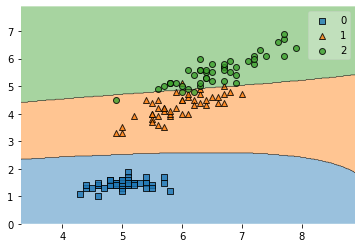

In [16]:
plot_decision_regions(X=np.array(data_train),
                      y=np.array(target_train),
                      clf=clf)

## 5-模型準確率分析

In [17]:
from sklearn.metrics import accuracy_score
predict = clf.predict(data_test)
print("預測:", list(predict))
print("正確標籤:", list(target_test))
print("正確率: ", accuracy_score(target_test, predict) * 100, "%")

預測: [1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1]
正確標籤: [1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1]
正確率:  93.33333333333333 %
